In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os
plot_dir = "/home/llr/ilc/shi/code/Energy-Reco/Figures"
plt.style.use('/home/llr/ilc/shi/code/Plot_style/cepc.mplstyle')
figSize = (8, 6)
SamplingLayer=30
ECAL_layers=120
Si=0.75
CellSize=5.0
Threshold=0.1
CONF=3
NN="Threshold0.1"
axhline_lr=1.5
def clean_number(x):
    s = f"{x:g}"          # g 格式自动去掉不必要的小数
    return s
# Read Data
plot_conf = None
#Config = ("SumE", "NHits","RecoE_cheat")
#Config = ("SumE", "NHits","RecoE_cheat","RecoE_MLP0","RecoE_DGCNN0")
#Config = ("SumE", "RecoE_MLP_GELU","RecoE_MLP_Softsign","RecoE_MLP_Res_PReLU")
# Config = ("SumE", "NHits_Calib")
# Legengd_Config = ("Sum E","N Hits")
# plot_conf = "basic"
# Config = ("SumE", "NHits_Calib","RecoE_MLP")
# Legengd_Config = ("Sum E","N Hits","MLP")
# plot_conf = "leakage"
#Config = ("RecoE_MLP","RecoE_DGCNN_KNN8_[128]","RecoE_DGCNN_KNN4_[128]","RecoE_DGCNN_KNN32_[128]")
#Config = ("RecoE_MLP","RecoE_DGCNN_KNN0.5-16","RecoE_DGCNN_KNN0.2-16_WD1e-18","RecoE_DGCNN_KNN0.5-32_WD1e-15")
# Config = ("SumE","NHits_Calib","RecoE_MLP","RecoE_DGCNN-Hit")
# Legengd_Config = ("Sum E","N Hits","MLP","DGCNN")
# plot_conf = "ML"
# WD=("1e-10","1e-8","1e-6")
# Config = tuple(f"RecoE_MLP_WD{c}_[256]" for c in WD)
# #Config=("NHits","NHits_Calib")
# Legengd_Config=Config

##DGCNN
#Config = ("RecoE_DGCNN_WD1e-9","RecoE_DGCNN_WD1e-8","RecoE_DGCNN_WD1e-7","RecoE_DGCNN_WD1e-6","RecoE_DGCNN_WD1e-5")
#Config = ("RecoE_DGCNN_[256]","RecoE_DGCNN_[128]")
colors = ['blue', 'green', 'red','orange','purple','brown','cyan','magenta']
dataPath = f"/home/llr/ilc/shi/data/SiWECAL-Prototype/Simu2025-06/CONF{CONF}/gamma/Validate/Merged_X{CellSize:.1f}mm_Y{CellSize:.1f}mm_Si{Si:.2f}mm_layer{SamplingLayer}_in{ECAL_layers}/Reco_Results"

#V1 and V2
# fileNames = (f"/home/llr/ilc/shi/data/SiWECAL-Prototype/Simu2025-06/CONF3/gamma/Validate/Merged_X{CellSize:.1f}mm_Y{CellSize:.1f}mm_Si{Si:.2f}mm_layer30_in120/Reco_Results/SumE_Fit.csv",
#              f"/home/llr/ilc/shi/data/SiWECAL-Prototype/Simu2025-06/CONF0/gamma/Validate/Merged_X{CellSize:.1f}mm_Y{CellSize:.1f}mm_Si{Si:.2f}mm_layer30_in60/Reco_Results/SumE_Fit.csv")
# Config = ("GeoV2","GeoV1")

#Loss function comparison
# Config = ("RecoE_MLP_MSE","RecoE_MLP_RelativeMSE","RecoE_MLP_Huber")
# dataPath="/home/llr/ilc/shi/data/SiWECAL-Prototype/Simu2025-06/CONF0/gamma/Validate/Merged_X5.0mm_Y5.0mm_Si0.45mm_layer30_in60/Reco_Results/Cache"
# Legengd_Config = ("MSE","Relative MSE","Huber")
# plot_conf = "huber"

#CONF4 specific for 0.15*1*1 mm3 cells
# fileNames = (f"/home/llr/ilc/shi/data/SiWECAL-Prototype/Simu2025-06/CONF4/gamma/Validate/Merged_X{CellSize:.1f}mm_Y{CellSize:.1f}mm_Si0.15mm_layer30_in120/Reco_Results/NHits_Calib_Fit.csv",
#             f"/home/llr/ilc/shi/data/SiWECAL-Prototype/Simu2025-06/CONF4/gamma/Validate/Merged_X{CellSize:.1f}mm_Y{CellSize:.1f}mm_Si0.15mm_layer30_in120/Reco_Results/NHits_Fit.csv",             
#             f"/home/llr/ilc/shi/data/SiWECAL-Prototype/Simu2025-06/CONF3/gamma/Validate/Merged_X{CellSize:.1f}mm_Y{CellSize:.1f}mm_Si0.75mm_layer30_in120/Reco_Results/NHits_Calib_Fit.csv",
#             f"/home/llr/ilc/shi/data/SiWECAL-Prototype/Simu2025-06/CONF3/gamma/Validate/Merged_X{CellSize:.1f}mm_Y{CellSize:.1f}mm_Si0.75mm_layer30_in120/Reco_Results/NHits_Fit.csv"
#             )
# Config = ("0.15 mm Calibrated","0.15 mm",
#     "0.75 mm Calibrated","0.75 mm")
# Legengd_Config=Config

particleEnergy = []
meanGamma = []
meanGammaErr = []
peakGamma = []
peakGammaErr = []
resGamma = []
resGammaErr = []
valLoss = []

for i_config in range(len(Config)):
    fileName = os.path.join(dataPath, f"{Config[i_config]}_Fit.csv")
# for fileName in fileNames:
    #fileName = os.path.join(dataPath, f"{Config[i_config]}_Fit_Threshold{Threshold}.csv")
    #fileName = fileNames[i_config]
    df = pd.read_csv(fileName)
    particleEnergy.append(df["ParticleEnergy"].to_numpy())
    meanGamma.append(df["Mean_Gamma"].to_numpy())
    meanGammaErr.append(df["Mean_Gamma_Error"].to_numpy())
    peakGamma.append(df["Peak_Gamma"].to_numpy())
    peakGammaErr.append(df["Peak_Gamma_Error"].to_numpy())
    resGamma.append(df["Res_Gamma"].to_numpy())
    resGammaErr.append(df["Res_Gamma_Error"].to_numpy())
    if "Best_Val_Loss" in df.columns:
        valLoss.append(df["Best_Val_Loss"].iloc[0])
    else:
        valLoss.append(float(-1))
        print(f"⚠️ Warning: 'Best_Val_Loss' not found in {fileName}")

    print(f"Loaded {fileName}")


⚠️ Warning: 'Best_Val_Loss' not found in /home/llr/ilc/shi/data/SiWECAL-Prototype/Simu2025-06/CONF3/gamma/Validate/Merged_X5.0mm_Y5.0mm_Si0.75mm_layer30_in120/Reco_Results/SumE_Fit.csv
Loaded /home/llr/ilc/shi/data/SiWECAL-Prototype/Simu2025-06/CONF3/gamma/Validate/Merged_X5.0mm_Y5.0mm_Si0.75mm_layer30_in120/Reco_Results/SumE_Fit.csv
⚠️ Warning: 'Best_Val_Loss' not found in /home/llr/ilc/shi/data/SiWECAL-Prototype/Simu2025-06/CONF3/gamma/Validate/Merged_X5.0mm_Y5.0mm_Si0.75mm_layer30_in120/Reco_Results/NHits_Calib_Fit.csv
Loaded /home/llr/ilc/shi/data/SiWECAL-Prototype/Simu2025-06/CONF3/gamma/Validate/Merged_X5.0mm_Y5.0mm_Si0.75mm_layer30_in120/Reco_Results/NHits_Calib_Fit.csv
Loaded /home/llr/ilc/shi/data/SiWECAL-Prototype/Simu2025-06/CONF3/gamma/Validate/Merged_X5.0mm_Y5.0mm_Si0.75mm_layer30_in120/Reco_Results/RecoE_MLP_Fit.csv
Loaded /home/llr/ilc/shi/data/SiWECAL-Prototype/Simu2025-06/CONF3/gamma/Validate/Merged_X5.0mm_Y5.0mm_Si0.75mm_layer30_in120/Reco_Results/RecoE_DGCNN-Hit_Fit.

Validation Loss [-1.0, -1.0, np.float64(0.0008597863260726), np.float64(0.0018816682717708)]


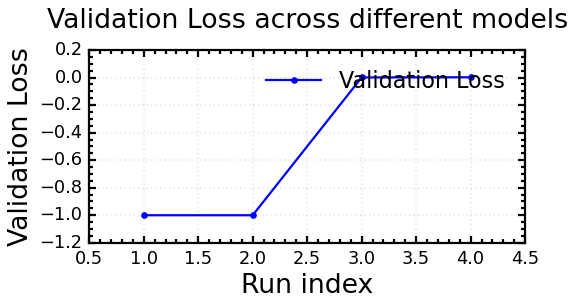

In [128]:
print("Validation Loss", valLoss)
plt.figure(figsize=(7, 4))
plt.plot(range(1, len(valLoss)+1), valLoss, marker='o', label="Validation Loss")
plt.xlabel("Run index")
plt.ylabel("Validation Loss")
plt.title("Validation Loss across different models")
plt.legend()
plt.tight_layout()
plt.show()


Config: SumE
Config: NHits_Calib
Config: RecoE_MLP
Config: RecoE_DGCNN-Hit


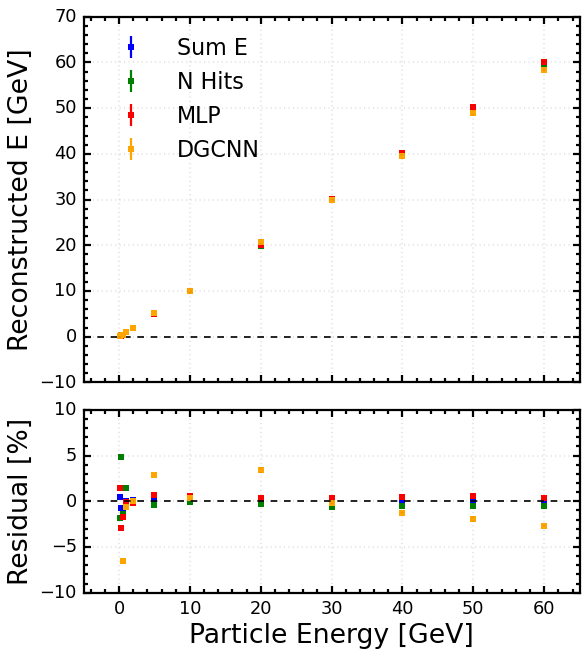

Config: SumE
Config: NHits_Calib
Config: RecoE_MLP
Config: RecoE_DGCNN-Hit


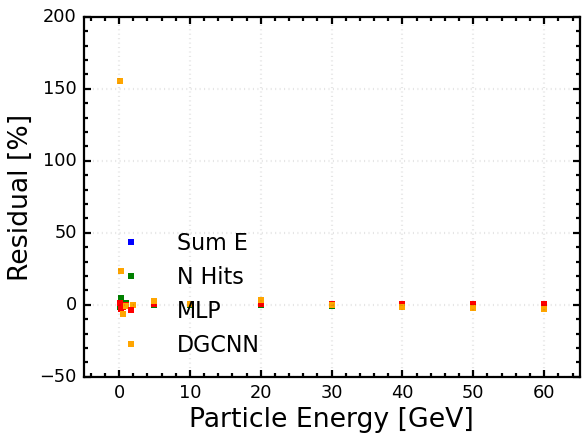

In [129]:

# Linearity and Resolution
def linear_func(x, a, b):
    return a * x + b

def fitAndResidualRatio(x, y, fit_range=(0,70)):
    """Linear fit and return coefficients, fit values, and relative residuals."""
    a0 = (y[-1] - y[0]) / (x[-1] - x[0])
    b0 = y[0]
    p0 = [a0, b0]
    upper_bound = [5*a0, np.inf]
    lower_bound = [0, -np.inf]  # Ensure slope is non-negative
    mask = (x >= fit_range[0]) & (x <= fit_range[1])
    coeffs, cov = curve_fit(linear_func, x[mask], y[mask], p0=p0, bounds=(lower_bound, upper_bound),sigma=x[mask], absolute_sigma=True)
    fitVals = linear_func(x, *coeffs)
    residualRatio = (y - fitVals) / fitVals
    return coeffs, fitVals, residualRatio
fitGamma,ResGamma = [],[]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(figSize[0], figSize[1]*1.6), 
        sharex=True,gridspec_kw={'height_ratios':[1, 0.5],'hspace': 0.1})

for ax in [ax1, ax2]:
    ax.yaxis.set_label_coords(-0.1, 0.5)  # x in axes coords, unify manually
MarkerSize = 10
for i_c in range(len(Config)):
    print(f"Config: {Config[i_c]}")
    if Config[i_c] == "RecoE_DGCNN-Hit":
        fit_range = (1, 70)
    else:
        fit_range = (0, 70)
    #Calib
    coeff,fitVals,residualRatio = fitAndResidualRatio(particleEnergy[i_c], peakGamma[i_c], fit_range=fit_range)
    peakGamma[i_c] = (peakGamma[i_c]-coeff[1])/(coeff[0])
    peakGammaErr[i_c] = peakGammaErr[i_c]/(coeff[0])
    coeff,fitVals,residualRatio = fitAndResidualRatio(particleEnergy[i_c], peakGamma[i_c], fit_range=fit_range)
    residualRatio = (peakGamma[i_c] - particleEnergy[i_c]) / particleEnergy[i_c]
    fitGamma.append(fitVals)
    ResGamma.append(residualRatio)
    # Gamma
    ax1.errorbar(particleEnergy[i_c], peakGamma[i_c], yerr=peakGammaErr[i_c],
        fmt='s', capsize=4, label=Legengd_Config[i_c], color=colors[i_c]
    )
    ax2.plot(particleEnergy[i_c], ResGamma[i_c]*100, 's', label='Gamma', color=colors[i_c])
    #ax1.plot(particleEnergy[i_c], fitGamma[i_c], '-', color=colors[i_c])
ax1.set_ylabel("Reconstructed E [GeV]")
ax1.axhline(0, color='black', lw=axhline_lr, linestyle='--')
#ax1.set_ylim(-100, 1300)
ax1.set_xlim(-5, 65)
#ax1.set_title("Linearity")
ax1.legend(loc='upper left')

ax2.set_ylim(-10, 10)
ax2.axhline(0, color='black', lw=axhline_lr, linestyle='--')
ax2.set_xlabel("Particle Energy [GeV]")
ax2.set_ylabel("Residual [%]")
if plot_conf:
    plt.savefig(f"{plot_dir}/Linearity_{plot_conf}.pdf", dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=figSize)

for i_c in range(len(Config)):
    print(f"Config: {Config[i_c]}")
    # 假设 fitGamma 和 ResGamma 已经计算好
    plt.plot(particleEnergy[i_c], ResGamma[i_c]*100, 's', label=Legengd_Config[i_c], 
             color=colors[i_c])

plt.xlabel("Particle Energy [GeV]")
plt.ylabel("Residual [%]")
plt.xlim(-5, 65)
#plt.ylim(-15, 15)
plt.legend(loc='lower left')
plt.show()


/tmp/ipykernel_261456/2618342319.py:6: RuntimeWarning: divide by zero encountered in divide
  return 1 / np.sqrt(E)


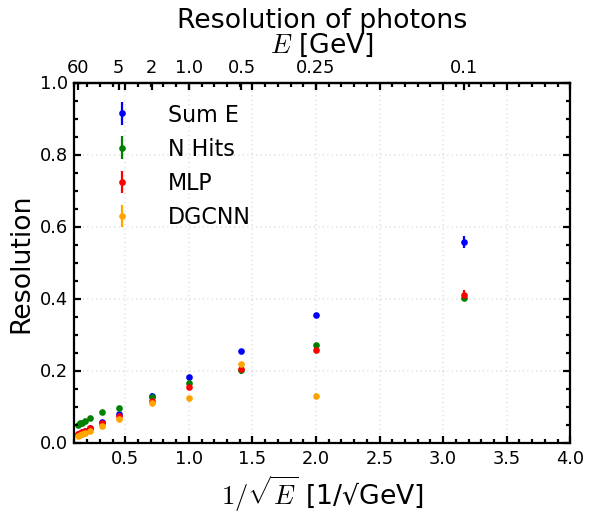

In [130]:
plt.figure(figsize=figSize)
ax = plt.gca()
def forward(x):  # 下轴(1/sqrt(E)) -> 上轴(E)
    return 1 / (x**2)
def inverse(E):  # 上轴(E) -> 下轴(1/sqrt(E))
    return 1 / np.sqrt(E)
secax = ax.secondary_xaxis("top", functions=(forward, inverse))
secax.set_xlabel(r"$E$ [GeV]")
E_ticks = [0.1, 0.25, 0.5, 1.0, 2, 5, 60]
secax.set_xticks(E_ticks)
secax.set_xticklabels(E_ticks)
secax.xaxis.set_minor_locator(plt.NullLocator())  # 禁用所有次刻度
secax.xaxis.set_tick_params(which='both', top=True, labeltop=True, bottom=False, labelbottom=False)
for i_c in range(len(Config)):
    x_vals = 1 / np.sqrt(particleEnergy[i_c])
    ax.errorbar(x_vals, resGamma[i_c], yerr=resGammaErr[i_c],
                fmt='o', capsize=4, label=Legengd_Config[i_c], color=colors[i_c])
ax.set_xlabel(r"$1/\sqrt{E}$ [1/√GeV]")
ax.set_ylabel("Resolution")
ax.set_title("Resolution of photons", pad=50)
ax.legend(loc='upper left')
ax.set_xlim(0.1, 4)
ax.set_ylim(0, 1)
plt.show()

    

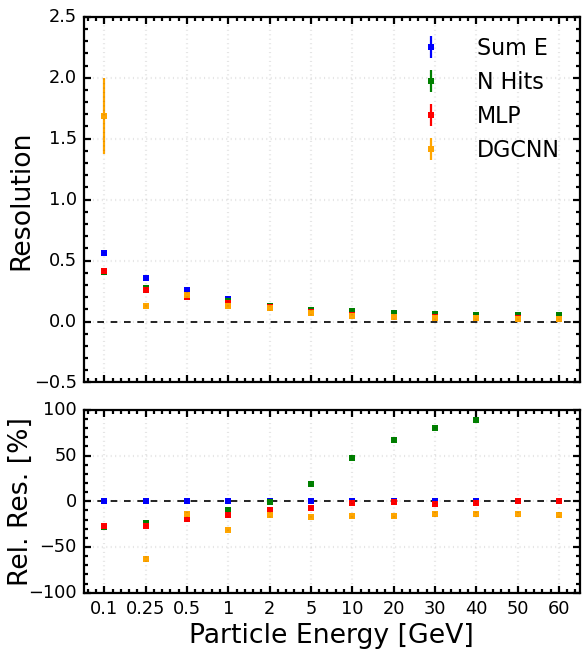

In [132]:
fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(figSize[0], figSize[1]*1.6),
    sharex=True, gridspec_kw={'height_ratios': [1, 0.5], 'hspace': 0.1}
)
for ax in [ax1, ax2]:
    ax.yaxis.set_label_coords(-0.1, 0.5)  # x in axes coords, unify manually

MarkerSize = 10

# --- New: create uniform x positions ---
n_points = len(particleEnergy[0])     # number of energy points
x_uniform = np.arange(n_points)       # 0,1,2,...

# Reference (config 0)
y_ref = np.array(resGamma[0])
y_ref_err = np.array(resGammaErr[0])

# --- Upper panel ---
for i_c in range(len(Config)):
    y_vals = np.array(resGamma[i_c])
    y_errs = np.abs(np.array(resGammaErr[i_c]))

    ax1.errorbar(
        x_uniform, y_vals, yerr=y_errs,
        fmt='s', capsize=4, label=Legengd_Config[i_c],
        color=colors[i_c]
    )

# --- Lower panel ---
for i_c in range(len(Config)):
    y_vals = np.array(resGamma[i_c])
    y_errs = np.abs(np.array(resGammaErr[i_c]))

    if i_c == 0:
        ax2.errorbar(
            x_uniform, np.zeros_like(y_vals), yerr=0,
            fmt='s', capsize=4, label=f"{Config[i_c]} (ref)",
            color=colors[i_c]
        )
    else:
        residual = (y_vals - y_ref) / y_ref
        ax2.errorbar(
            x_uniform, residual * 100, yerr=0,
            fmt='s', capsize=4,
            label=f"{Legengd_Config[i_c]} / {Legengd_Config[0]} - 1",
            color=colors[i_c]
        )

ax1.set_ylabel("Resolution")
ax1.axhline(0, color='black', lw=axhline_lr, linestyle='--')
ax1.legend(loc='upper right')
ax2.axhline(0, color='black', lw=axhline_lr, linestyle='--')
ax2.set_ylabel("Rel. Res. [%]")

# --- New: set xticks to energy values ---
ax1.set_xticks(x_uniform)
ax1.set_xticklabels([clean_number(e) for e in particleEnergy[0]])  # 显示能量
ax1.set_xlim(-0.5, n_points - 0.5)
ax2.set_xlabel("Particle Energy [GeV]")
ax2.set_ylim(-100, 100)
if plot_conf:
    plt.savefig(f"{plot_dir}/Resolution_{plot_conf}.pdf", dpi=300, bbox_inches='tight')
plt.show()
